In [2]:
'''**Задание 1**
Импортируйте библиотеки `pandas`, `numpy` и `matplotlib`.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки `sklearn`.
Создайте датафреймы `X` и `y` из этих данных.
Разбейте эти датафреймы на тренировочные (`X_train, y_train`) и тестовые (`X_test, y_test`)
с помощью функции `train_test_split` так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент `random_state` должен быть равен 42.
Масштабируйте данные с помощью `StandardScaler`.
Постройте модель TSNE на тренировочный данных с параметрами:
`n_components=2`, `learning_rate=250`, `random_state=42`.
Постройте диаграмму рассеяния на этих данных.'''

'**Задание 1**\nИмпортируйте библиотеки `pandas`, `numpy` и `matplotlib`.\nЗагрузите "Boston House Prices dataset" из встроенных наборов \nданных библиотеки `sklearn`.\nСоздайте датафреймы `X` и `y` из этих данных.\nРазбейте эти датафреймы на тренировочные (`X_train, y_train`) и тестовые (`X_test, y_test`)\nс помощью функции `train_test_split` так, чтобы размер тестовой выборки\nсоставлял 20% от всех данных, при этом аргумент `random_state` должен быть равен 42.\nМасштабируйте данные с помощью `StandardScaler`.\nПостройте модель TSNE на тренировочный данных с параметрами:\n`n_components=2`, `learning_rate=250`, `random_state=42`.\nПостройте диаграмму рассеяния на этих данных.'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

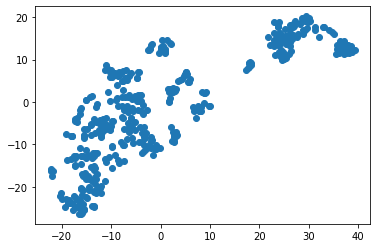

In [8]:
plt.scatter(X_train_tsne [:, 0], X_train_tsne[:, 1])
plt.show()

In [9]:
'''**Задание 2**
С помощью `KMeans` разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма `X_train`.
Параметр `max_iter` должен быть равен 100, `random_state` сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения `price` и `CRIM` в разных кластерах.
'''

from sklearn.cluster import KMeans 
klusters = KMeans(n_clusters=3, random_state=42, max_iter=100)
klusters_train = klusters.fit_predict(X_train_scaled)

In [10]:
print('Первый кластер: ', y_train[klusters_train == 0].mean())
print('Второй кластер:', y_train[klusters_train == 1].mean())
print('Третий кластер:', y_train[klusters_train == 2].mean())

Первый кластер:  27.78837209302326
Второй кластер: 16.165354330708663
Третий кластер: 24.958115183246072


In [11]:
print('Первый кластер: ', X_train['CRIM'][klusters_train == 0].mean())
print('Второй кластер:', X_train['CRIM'][klusters_train == 1].mean())
print('Третий кластер:', X_train['CRIM'][klusters_train == 2].mean())

Первый кластер:  0.07356558139534886
Второй кластер: 10.797028425196853
Третий кластер: 0.42166020942408367


In [12]:
'''**Задание 3**
Примените модель `KMeans`, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения `price` и `CRIM` в разных кластерах на тестовых данных.'''


'**Задание 3**\nПримените модель `KMeans`, построенную в предыдущем задании,\nк данным из тестового набора.\nВычислите средние значения `price` и `CRIM` в разных кластерах на тестовых данных.'

In [14]:
labels_test = klusters.fit_predict(X_test_scaled)

print('тест_первый кластер - средняя цена: ', y_test[labels_test == 0].mean())
print('тест_первый кластер - средний уровень преступности: ', X_test.loc[labels_test == 0, 'CRIM'].mean())

тест_первый кластер - средняя цена:  33.871428571428574
тест_первый кластер - средний уровень преступности:  0.08618571428571427


In [15]:
print('тест_второй кластер - средняя цена: ', y_test[labels_test == 1].mean())
print('тест_второй кластер - средний уровень преступности: ', X_test.loc[labels_test == 1, 'CRIM'].mean())

тест_второй кластер - средняя цена:  21.552830188679245
тест_второй кластер - средний уровень преступности:  0.25200716981132076


In [16]:
print('тест_третий кластер - средняя цена: ', y_test[labels_test == 2].mean())
print('тест_третий кластер - средний уровень преступности: ', X_test.loc[labels_test == 2, 'CRIM'].mean())

тест_третий кластер - средняя цена:  16.43714285714286
тест_третий кластер - средний уровень преступности:  10.165531142857143
